# Feature Engneering Project

### Data Description:
The actual concrete compressive strength (MPa) for a given mixture under aspecific age (days) was determined from laboratory. Data is in raw form (not scaled). The data has 8 quantitative input variables, and 1 quantitative output
variable, and 1030 instances (observations).

### Domain:
Cement manufacturing

### Attribute Information:
* Cement : measured in kg in a m3 mixture
* Blast : measured in kg in a m3 mixture
* Fly ash : measured in kg in a m3 mixture
* Water : measured in kg in a m3 mixture
* Superplasticizer : measured in kg in a m3 mixture
* Coarse Aggregate : measured in kg in a m3 mixture
* Fine Aggregate : measured in kg in a m3 mixture
* Age : day (1~365)
* Concrete compressive strength measured in MPa

### Objective:
Modeling of strength of high performance concrete using Machine Learning

### 1. Import the Libraries

In [1]:
#Importing All the Libriaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, FunctionTransformer
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score, StratifiedKFold,RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor,ExtraTreesRegressor)
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.ensemble import VotingRegressor
from scipy import stats
from scipy.stats import zscore
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans
from sklearn.utils import resample
from scipy import stats; from scipy.stats import zscore, norm, randint
sns.set_style(style='darkgrid')  # Setting the plot style. Purely for aesthetic purposes
%matplotlib inline

### 2. Load the dataset

In [2]:
#Read the data as 'Data' dataframe
Data = pd.read_csv('concrete.csv')

In [3]:
#Reading the first five rows of dataset
Data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [4]:
#last 5 rows using tail() function
Data.tail()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06
1029,540.0,0.0,0.0,173.0,0.0,1125.0,613.0,7,52.61


* All the columns seem to be numeric, although not necesarily continuous
* Let's check the datatypes, shape and number of missing values in the dataframe to see if there are read as numerical attributes

### 3. Data Preprocessing

In [5]:
#checking the shape of dataset. Dataset having 846 rows and 19 columns.
Data.shape

(1030, 9)

In [6]:
#To show the detailed summary
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [7]:
#To get the number of columns
Data.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

In [8]:
col = Data.columns[Data.isnull().any()]
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


* cement: Data ranges between 102 to 540, while 25th and 75th percentile is spread between 192.38 to 350. Median (272.90) is less than Mean (281.17) which means cement is moderately skewed to the right. Column has no outliers.
* slag: Data ranges between 0 to 359.40, while 25th and 75th percentile is spread between 0 to 142.95. Median (22) is less than Mean (73.90) which means slag is moderately skewed to the right. Column has outliers.
* ash: Data ranges between 0 to 200.10, while 25th and 75th percentile is spread between 0 to 118.30. Median (0) is less than Mean (54.19) which mean ash is moderately skewed to the right. Column has no outliers.
* water: Data ranges between 121.80 to 247, while 25th and 75th percentile is spread between 164.90 and 192. Median (185) is greater than Mean (181.57) which means water is skewed to the left (fairly sym). Column has outliers.
* superplastic: Data ranges between 0 to 32.20, while 25th and 75th percentile is spread between 0 to 10.20. Median (6.40) is greater than Mean (6.20) which means superplastic is moderately skewed to the left. Column has outliers.
* coarseagg: Data ranges between 801 to 1145, while 25th and 75th percentile is spread between 932 to 1029.40. Median (968) is less than Mean (972.92) which means coarseagg is skewed to the right (fairly sym). Column has no outliers.
* fineagg: Data ranges between 594 to 992.60, while 25th and 75th percentile is spread between 730.95 to 824. Median (779.5) is greater than Mean (773.58) which means fineagg is skewed to the left (fairly sym). Column has no outliers.
* age: Data ranges between 1 to 365, while 25th and 75th percentile is spread between 7 to 56. Median (28) is less than Mean (45.66) which means age is highly skewed to the right. Column has no outliers.
* strength: Data ranges between 2.33 to 82.60, while 25th and 75th percentile is spread between 23.71 to 46.14. Median (34.45) is less than Mean (35.82) which means strength is slightly skewed to the right (fairly sym). Column has no outliers.

It gives the descriptive statistics (mean, median, mode, percentiles, min, max, standard deviation) of the columns of the dataset.

#### Checking Missing Value

In [9]:
# Checking Missing value present in the dataset. It seems that datset is having missing value
Data.apply(lambda x : sum(x.isnull()))

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

#### Correlation Matrix
* From the observation of Correction map, we cannot see any strong corelation between all atrributes.

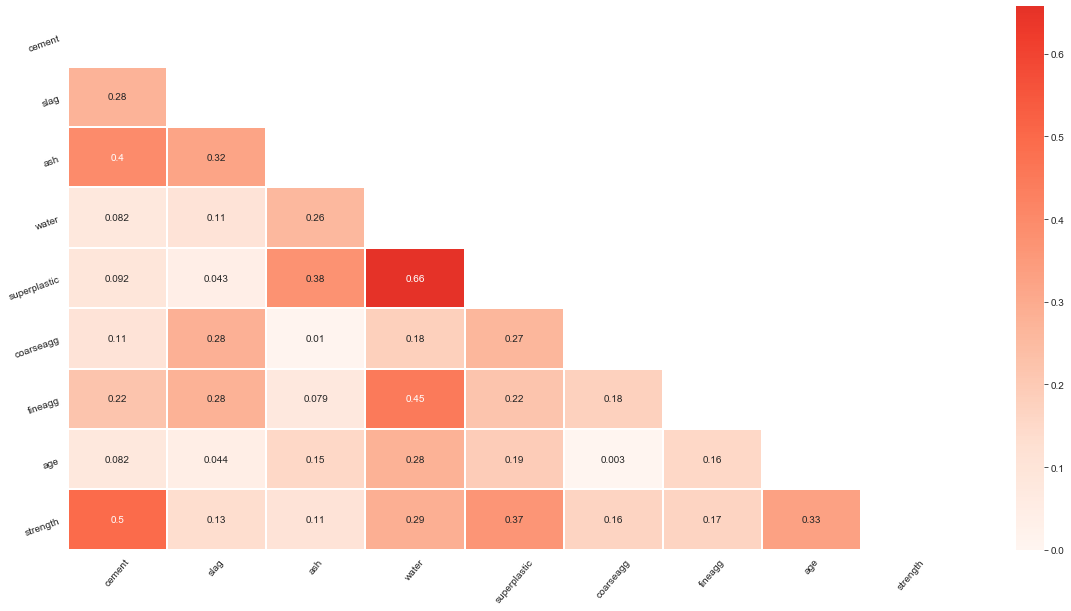

In [10]:
corr = abs(Data.corr()) # correlation matrix
lower_triangle = np.tril(corr, k = -1)  # select only the lower triangle of the correlation matrix
mask = lower_triangle == 0  # to mask the upper triangle in the following heatmap

plt.figure(figsize = (20,10))  # setting the figure size
sns.set_style(style = 'white')  # Setting it to white so that we do not see the grid lines
sns.heatmap(lower_triangle, center=0.5, cmap= 'Reds', annot= True, xticklabels = corr.index, yticklabels = corr.columns,
            cbar= True, linewidths= 1, mask = mask)   # Da Heatmap
plt.xticks(rotation = 50)   # Aesthetic purposes
plt.yticks(rotation = 20)   # Aesthetic purposes
plt.show()

### Univariate analysis

In [11]:
# Functions that will help us with EDA plot
def odp_plots(Data, col):
    f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 7.2))
    
    # Boxplot to check outliers
    sns.boxplot(x = col, data = Data, ax = ax1, orient = 'v', color = 'darkslategrey')
    
    # Distribution plot with outliers
    sns.distplot(Data[col], ax = ax2, color = 'teal', fit = norm, rug = True).set_title(f'{col} with outliers')
    ax2.axvline(Data[col].mean(), color = 'r', linestyle = '--', label = 'Mean', linewidth = 1.2)
    ax2.axvline(Data[col].median(), color = 'g', linestyle = '--', label = 'Median', linewidth = 1.2)
    ax2.axvline(Data[col].mode()[0], color = 'b', linestyle = '--', label = 'Mode', linewidth = 1.2); ax2.legend(loc = 'best')
    
    # Removing outliers, but in a new dataframe
    upperbound, lowerbound = np.percentile(Data[col], [1, 99])
    y = pd.DataFrame(np.clip(Data[col], upperbound, lowerbound))
    
    # Distribution plot without outliers
    sns.distplot(y[col], ax = ax3, color = 'tab:orange', fit = norm, rug = True).set_title(f'{col} without outliers')
    ax3.axvline(y[col].mean(), color = 'r', linestyle = '--', label = 'Mean', linewidth = 1.2)
    ax3.axvline(y[col].median(), color = 'g', linestyle = '--', label = 'Median', linewidth = 1.2)
    ax3.axvline(y[col].mode()[0], color = 'b', linestyle = '--', label = 'Mode', linewidth = 1.2); ax3.legend(loc = 'best')
    
    kwargs = {'fontsize':14, 'color':'black'}
    ax1.set_title(col + ' Boxplot Analysis', **kwargs)
    ax1.set_xlabel('Box', **kwargs)
    ax1.set_ylabel(col + ' Values', **kwargs)

    return plt.show()

Box plot, distribution of columns with and without outliers

Cement column
Number of rows with outliers: 0


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength


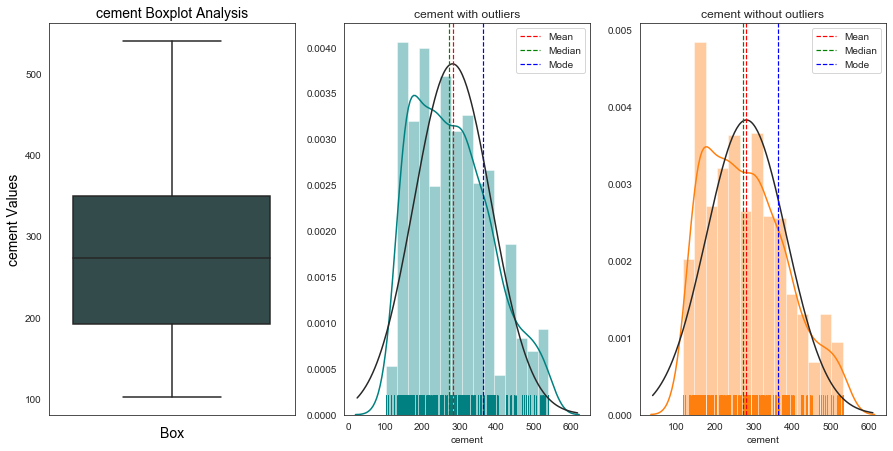

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
918,239.6,359.4,0.0,185.7,0.0,941.6,664.3,28,39.44
990,239.6,359.4,0.0,185.7,0.0,941.6,664.3,7,25.42


Slag column
Number of rows with outliers: 2


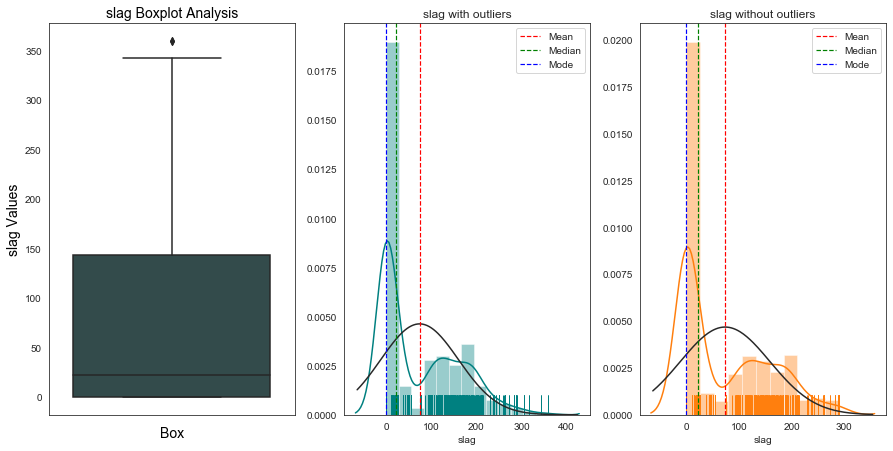

Ash column
Number of rows with outliers: 0


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength


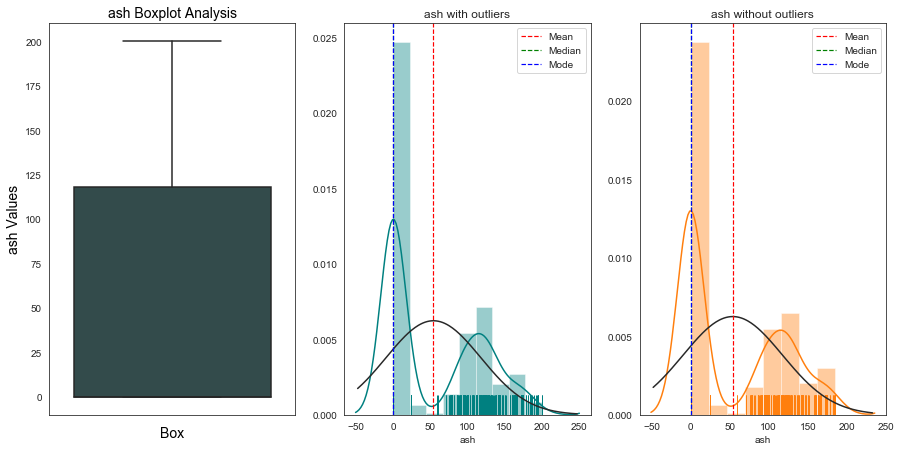

Water column
Number of rows with outliers: 9


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
66,237.0,92.0,71.0,247.0,6.0,853.0,695.0,28,28.63
263,236.9,91.7,71.5,246.9,6.0,852.9,695.4,28,28.63
432,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,28,24.24
462,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,100,39.23
587,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,3,7.75


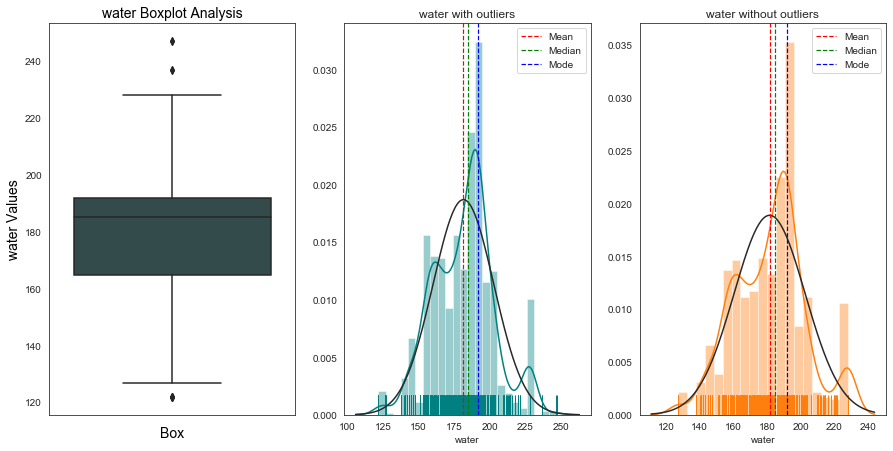

Superplastic column
Number of rows with outliers: 10


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
44,531.3,0.0,0.0,141.8,28.2,852.1,893.7,91,59.2
156,531.3,0.0,0.0,141.8,28.2,852.1,893.7,28,56.4
232,469.0,117.2,0.0,137.8,32.2,852.1,840.5,56,69.3
292,469.0,117.2,0.0,137.8,32.2,852.1,840.5,91,70.7
538,531.3,0.0,0.0,141.8,28.2,852.1,893.7,7,46.9


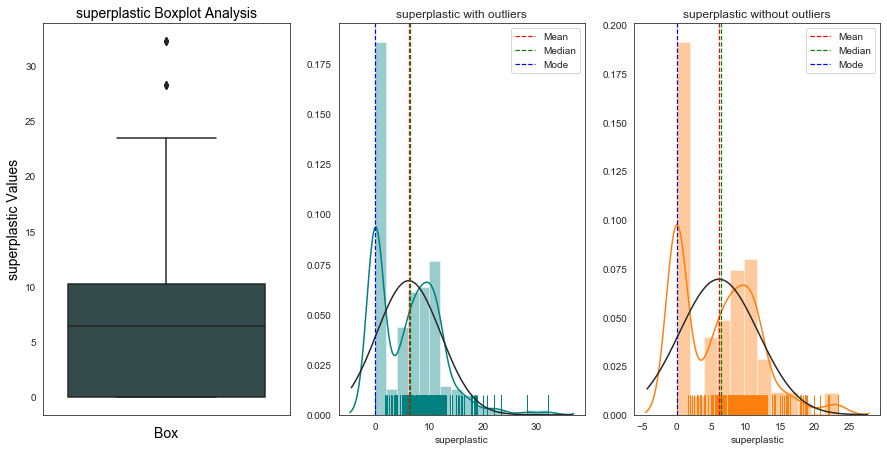

Coarseagg column
Number of rows with outliers: 0


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength


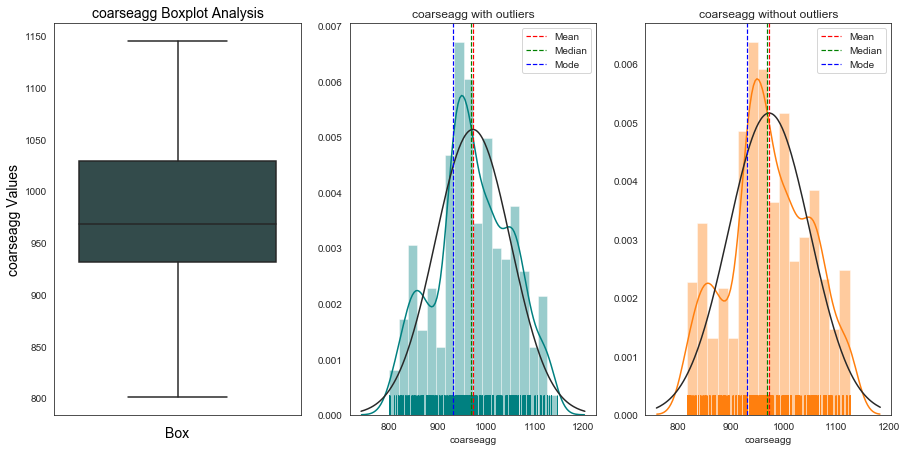

Fineagg column
Number of rows with outliers: 5


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
129,375.0,93.8,0.0,126.6,23.4,852.1,992.6,91,62.5
447,375.0,93.8,0.0,126.6,23.4,852.1,992.6,7,45.7
504,375.0,93.8,0.0,126.6,23.4,852.1,992.6,3,29.0
584,375.0,93.8,0.0,126.6,23.4,852.1,992.6,56,60.2
857,375.0,93.8,0.0,126.6,23.4,852.1,992.6,28,56.7


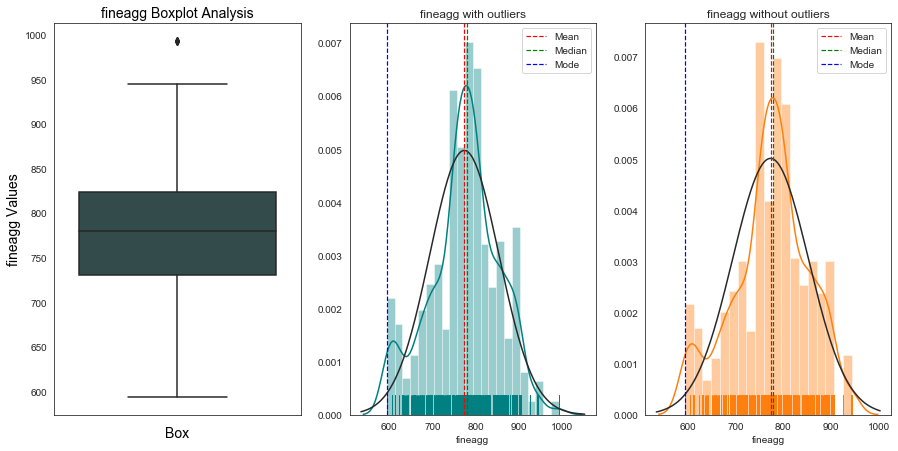

Age column
Number of rows with outliers: 59


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
51,331.0,0.0,0.0,192.0,0.0,978.0,825.0,180,39.00
64,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
93,427.5,47.5,0.0,228.0,0.0,932.0,594.0,180,41.84
99,237.5,237.5,0.0,228.0,0.0,932.0,594.0,180,36.25
103,380.0,0.0,0.0,228.0,0.0,932.0,670.0,180,53.10


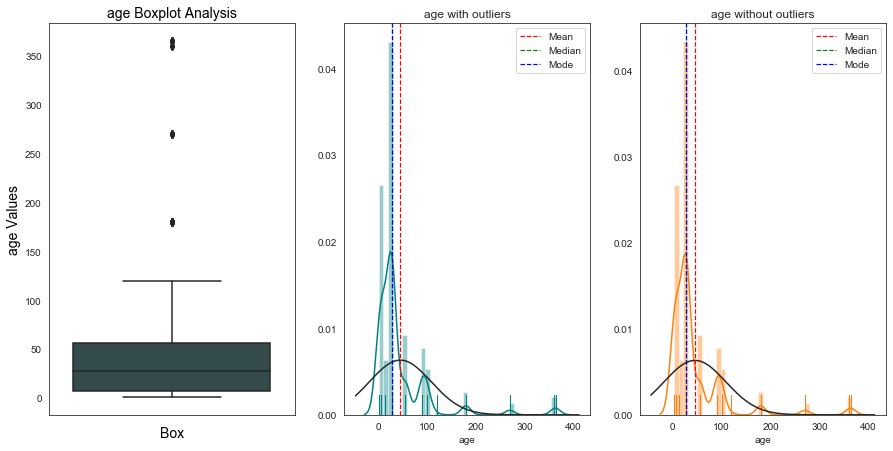

In [12]:
# Outlier, distribution for columns with outliers
print('Box plot, distribution of columns with and without outliers'); print('')

boxplotcolumns = list(Data.columns)[:-1]
for cols in boxplotcolumns:
    Q3 = Data[cols].quantile(0.75)
    Q1 = Data[cols].quantile(0.25)
    IQR = Q3 - Q1

    print(f'{cols.capitalize()} column')
    print(f'Number of rows with outliers: {len(Data.loc[(Data[cols] < (Q1 - 1.5 * IQR)) | (Data[cols] > (Q3 + 1.5 * IQR))])}')
    display(Data.loc[(Data[cols] < (Q1 - 1.5 * IQR)) | (Data[cols] > (Q3 + 1.5 * IQR))].head())
    odp_plots(Data, cols)

del cols, IQR, boxplotcolumns

### Multivariate Analysis

### Distribution of Features:
* Distribution of attributes (cement, coarseagg, fineagg, strength) are fairly normal.
* Attributes slag, ash, superplastic,age are right skewed.
* Attributes water left skewed.
* Removing the outliers of these highly skewed features may affect the nature of distribution.

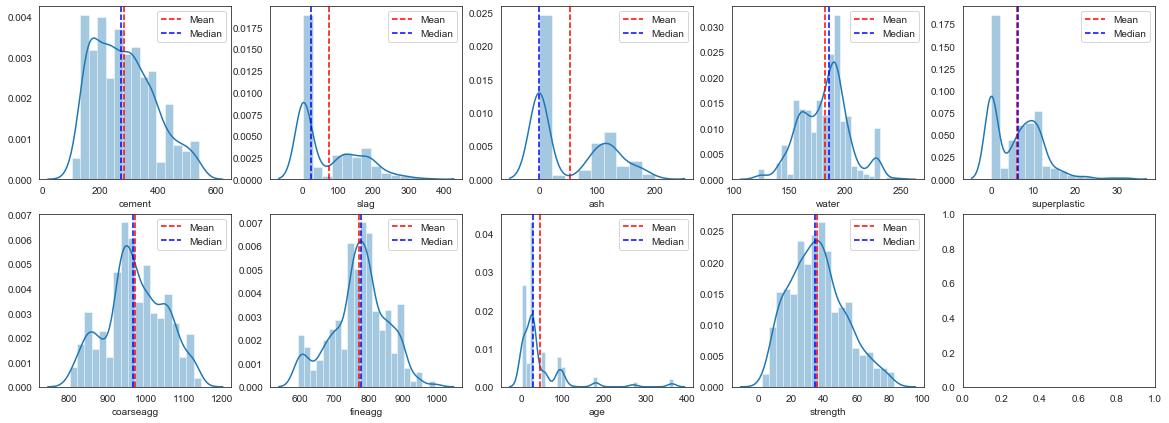

In [13]:
fix, ax = plt.subplots(nrows = 2, ncols = 5, figsize = [20, 7])
columns = ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'] 
for col, axes in zip(columns, ax.flatten()):
  sns.distplot(Data[col], ax = axes)
  mean = Data[col].mean()
  median = Data[col].median()
  axes.axvline(mean, color = 'r', linestyle = '--') # Vertical line along axis to indicate the mean
  axes.axvline(median, color = 'b', linestyle = '--') # Vertical line to indicate the median
  axes.legend({'Mean': mean, 'Median': median})

### Understanding the outier using boxplot

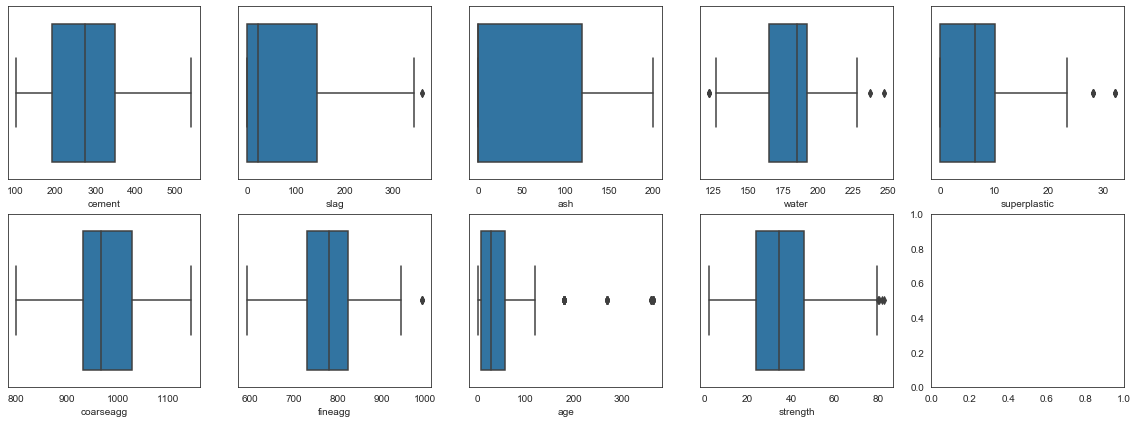

In [14]:
fig, ax = plt.subplots(nrows = 2, ncols = 5, figsize = [20, 7])

for col, axes in zip(columns, ax.flatten()):
  sns.boxplot(Data[col], ax = axes)

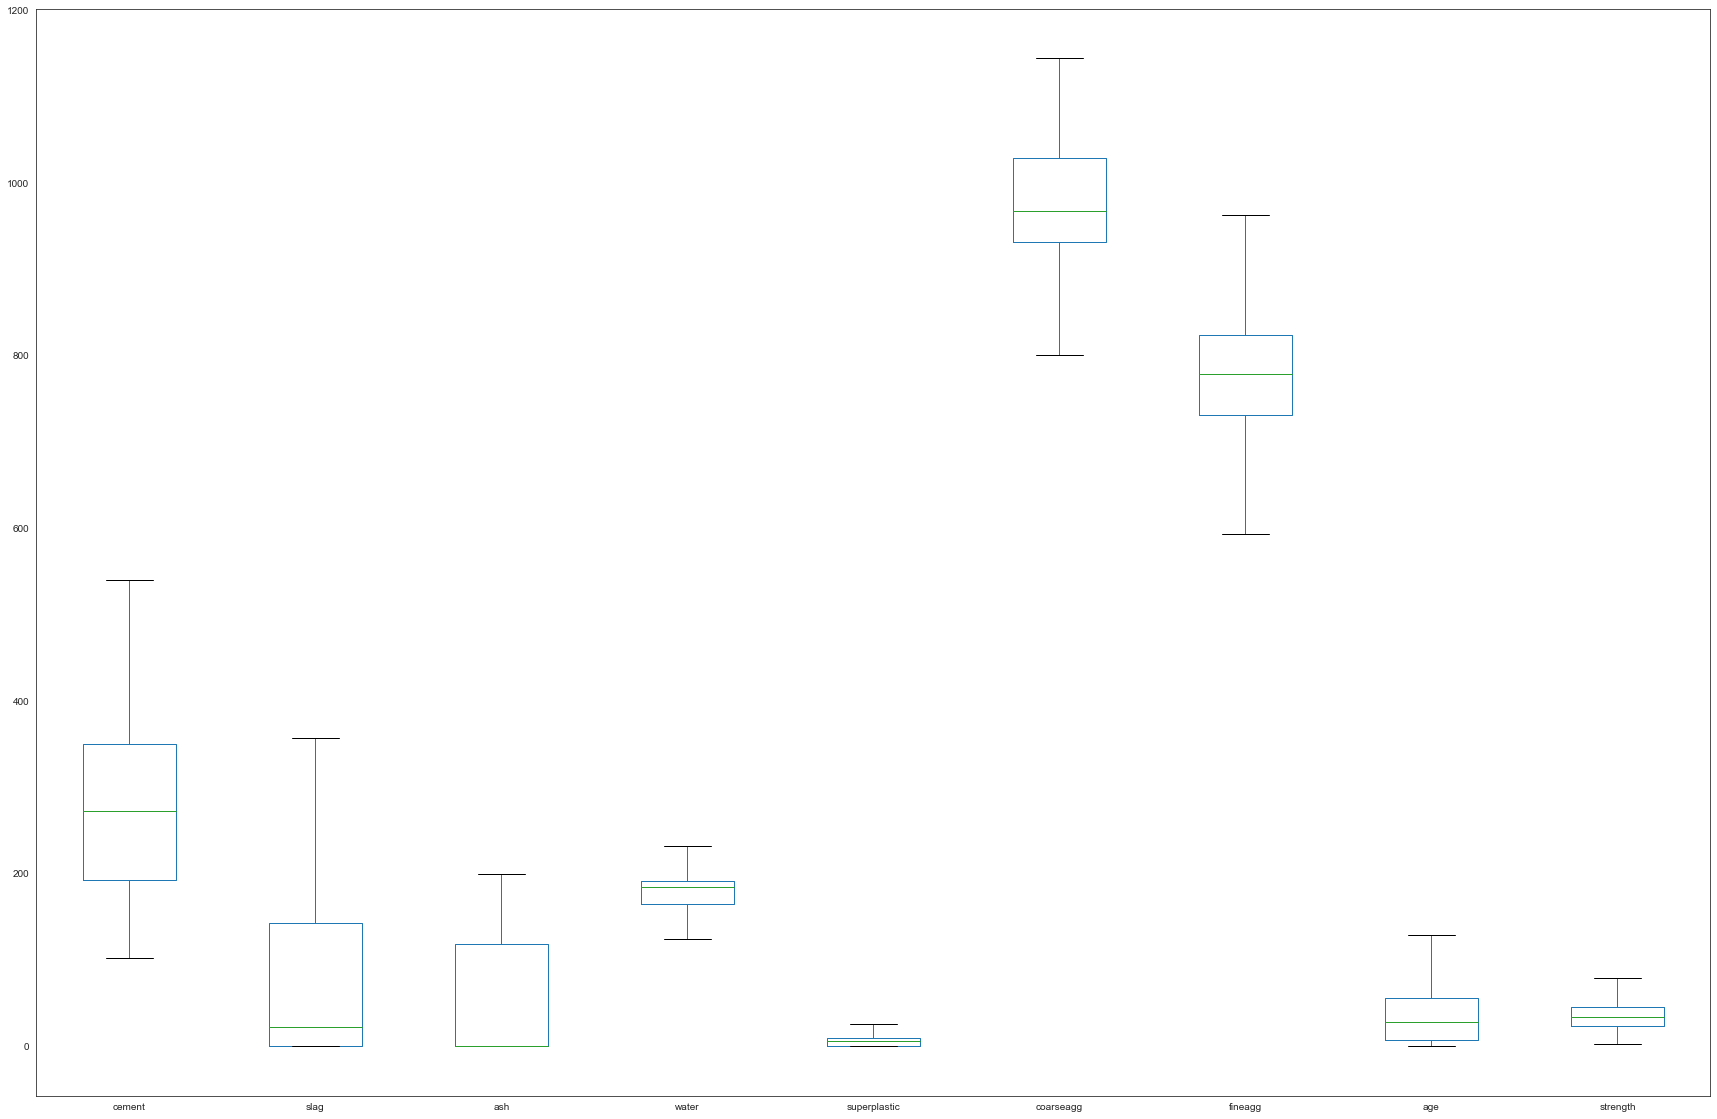

In [15]:
#funection to treat outliers in the features
outlier_features = ['slag','water', 'superplastic','fineagg','age','strength']
for col in outlier_features:
    p = np.percentile(Data[col], [25, 75])
    iqr = p[1]-p[0]
    Data.loc[:, col].clip(lower = p[0]-1.5*iqr, upper = p[1]+1.5*iqr, inplace = True)
Data.plot(kind = 'box', figsize = (30,20))


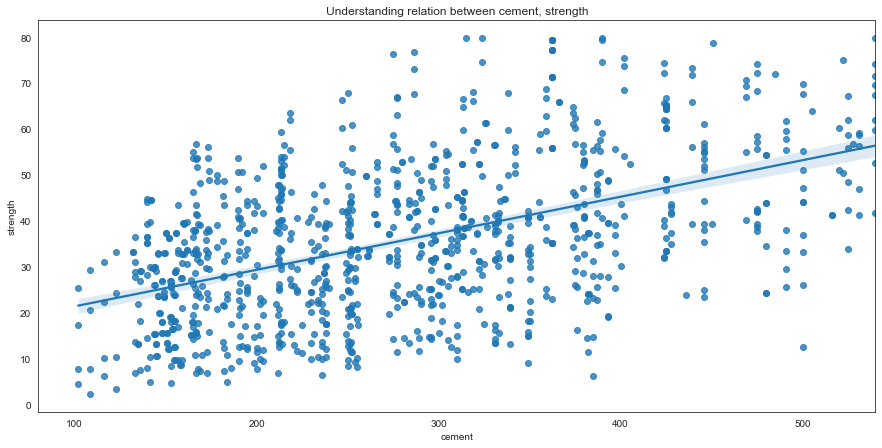

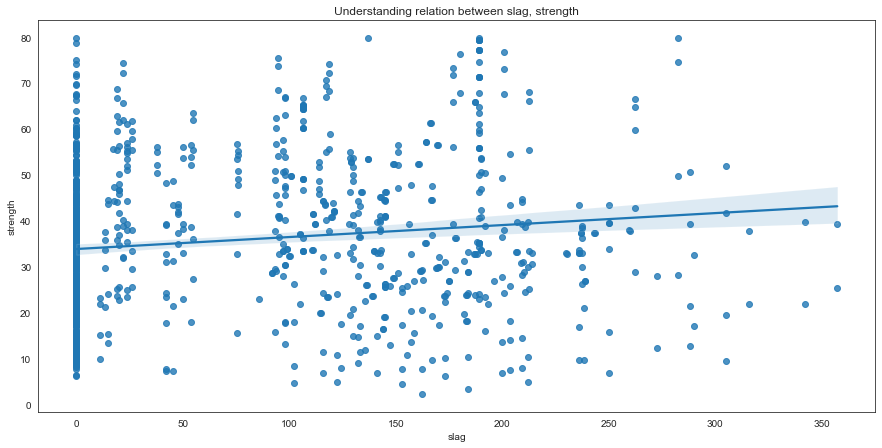

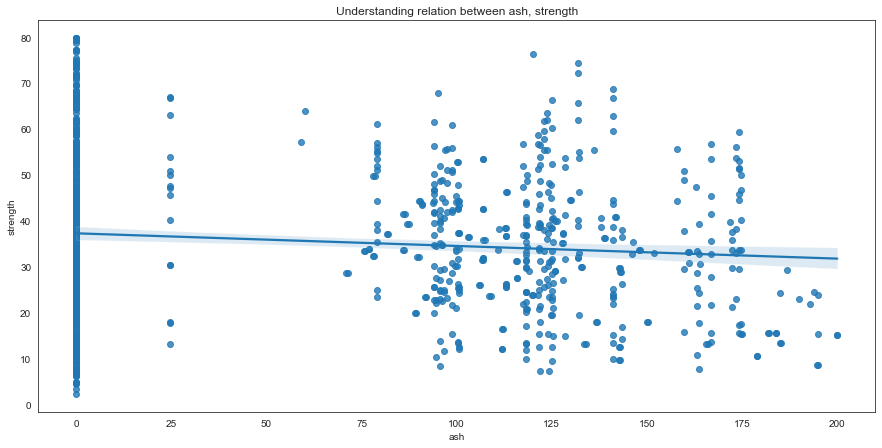

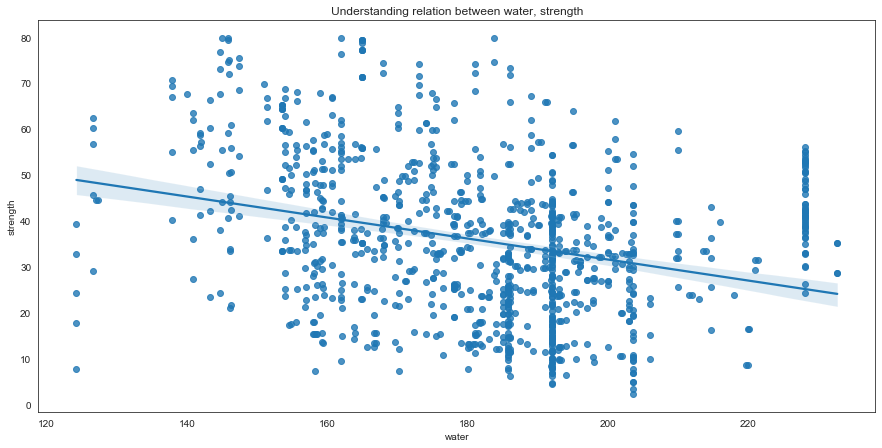

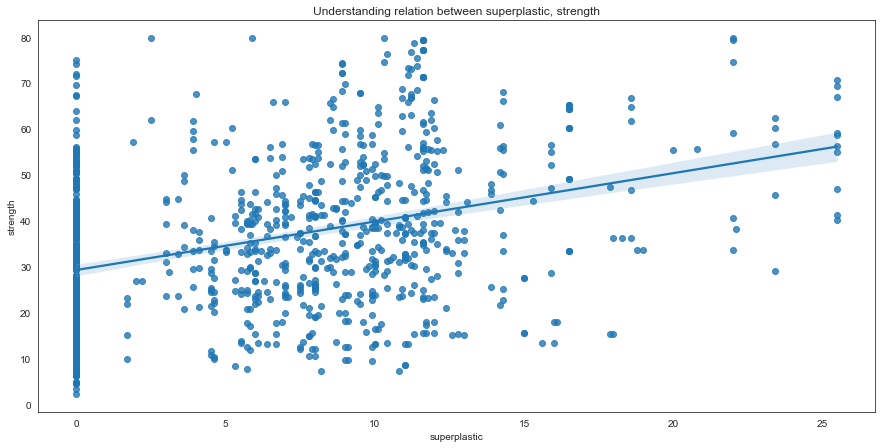

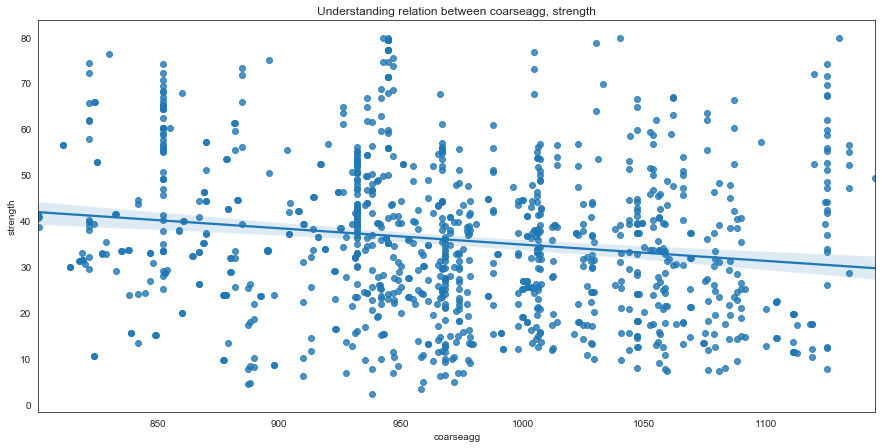

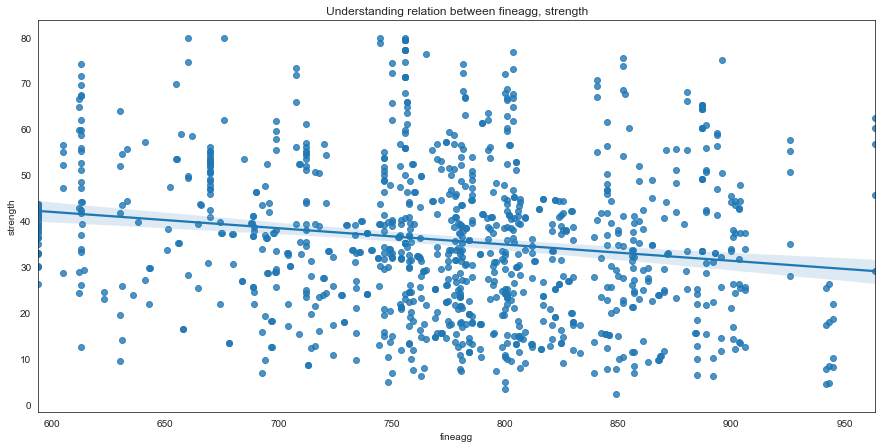

In [16]:
# Understanding relation between Strength and other indepedant variable with regplot
for col in list(Data.columns)[:-2]:
    fig, ax1 = plt.subplots(figsize = (15, 7.2), ncols = 1, sharex = False)
    sns.regplot(x = Data[col], y = Data['strength'], ax = ax1).set_title(f'Understanding relation between {col}, strength')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C3019B6E48>,
      dtype=object)

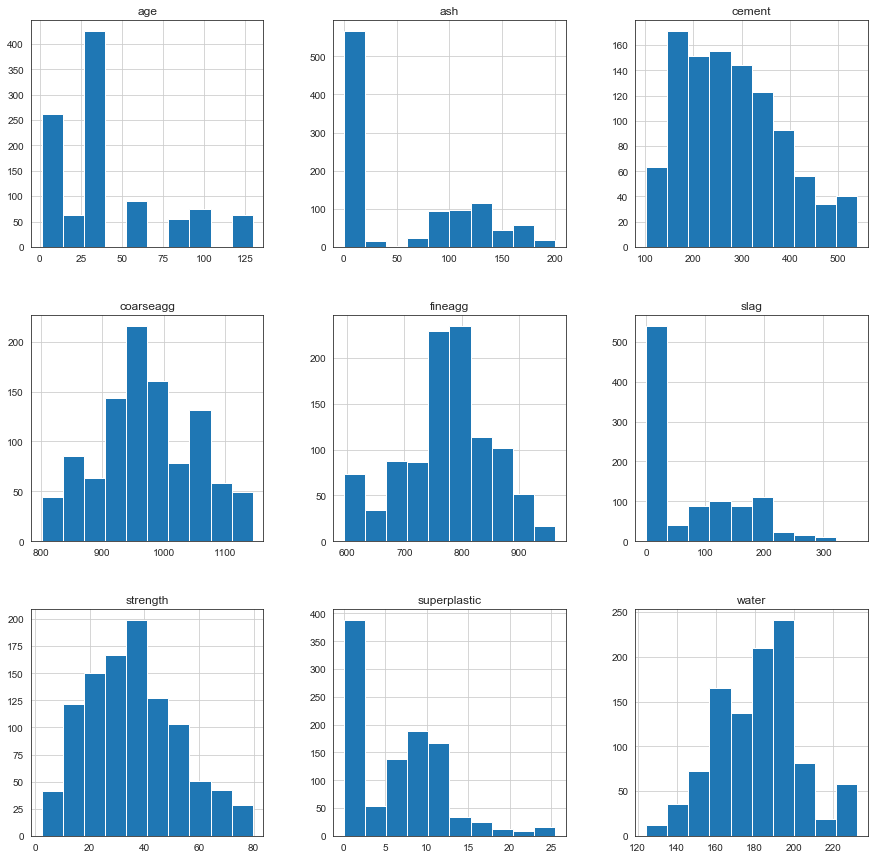

In [17]:
#Showing Data distribution using Histogram 
Data.hist(figsize=(15,15))

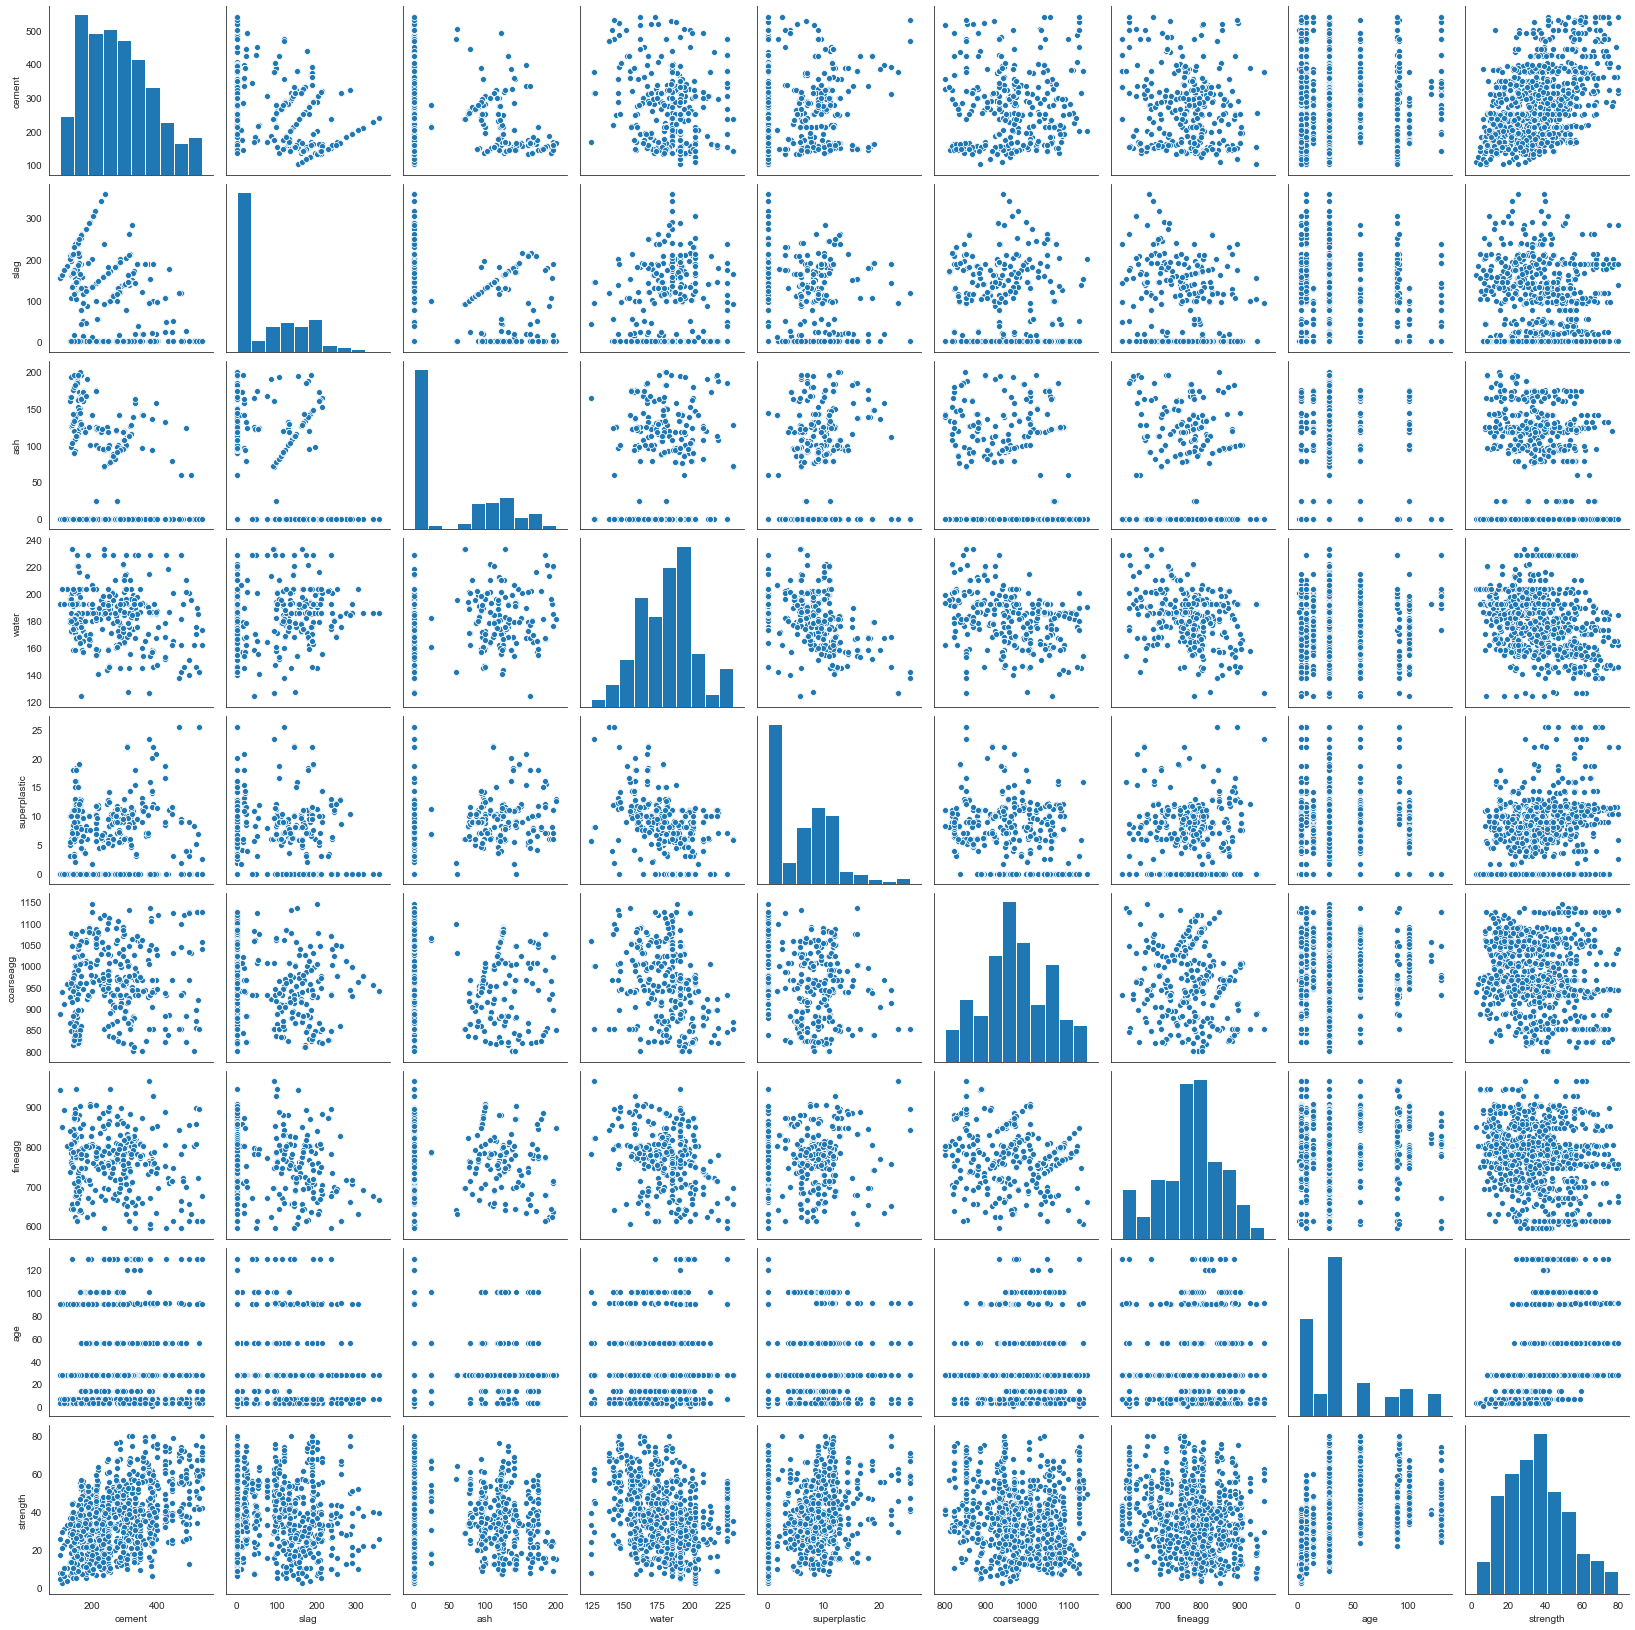

In [18]:
sns.pairplot(Data)

In [31]:
#Seperating input and target features
#Now separate the dataframe into dependent and independent variables
X= Data.iloc[:,0:8].values
y = Data.iloc[:,8].values

In [32]:
seed = 5
#splitting into train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = seed)

In [ ]:
# # Since we will be using multiple models using the same data, thhe following is a user defined function for that purpose 
# def fit_n_print(model, X_train, X_test, y_train, y_test):  # take the model, and data as inputs
#     from sklearn import metrics
    
#     model.fit(X_train, y_train)   # fir the model with the train data

#     y_pred = model.predict(X_test)  # make predictions on the test set

#     score = round(model.score(X_test, y_test), 4)   # compute accuracy score for test set
    
#     MSE = round(mean_squared_error(y_test, y_pred),4)

    
#     return score, MSE  # return all the metrics


In [ ]:
# #LinearRegression
# lr = LinearRegression()
# lr_accuracy, lr_MSE = fit_n_print(lr, X_train, X_test, y_train, y_test)

# #Ridge
# ridge = Ridge(alpha=.3)
# ridge_accuracy, ridge_MSE = fit_n_print(ridge, X_train, X_test, y_train, y_test)

# #Lasso
# lasso = Lasso(alpha=0.1)
# lasso_accuracy, lasso_MSE = fit_n_print(lasso, X_train, X_test, y_train, y_test)

# #KNeighbors
# kr = KNeighborsRegressor()
# kr_accuracy, kr_MSE= fit_n_print(kr, X_train, X_test, y_train, y_test)


# Svm = SVR(kernel = 'rbf')
# Svm_accuracy, Svm_MSE= fit_n_print(Svm, X_train, X_test, y_train, y_test)


# #Decision Tree
# Dt = DecisionTreeRegressor()
# Dt_accuracy, Dt_MSE= fit_n_print(Dt, X_train, X_test, y_train, y_test)

# #Random Forest
# RF = RandomForestRegressor()
# RF_accuracy, RF_MSE= fit_n_print(RF, X_train, X_test, y_train, y_test)

# #AdaBoost
# ada = AdaBoostRegressor()
# ada_accuracy, ada_MSE = fit_n_print(ada, X_train, X_test, y_train, y_test)

# #GradientBoost
# GB = GradientBoostingRegressor()
# GB_accuracy, GB_MSE= fit_n_print(GB, X_train, X_test, y_train, y_test)

# #Bagging
# BR = BaggingRegressor()
# BR_accuracy, BR_MSE= fit_n_print(BR, X_train, X_test, y_train, y_test)


In [ ]:
# result1 = pd.DataFrame({'Model' : ['Linear Regression', 'Ridge','Lasso','KNeighbours','SVM','DecisonTree', 'RandomForest','AdaBoost','GradientBoost', 'Bagging'],
#                           'Accuracy': [ lr_accuracy ,  ridge_accuracy ,  lasso_accuracy ,  kr_accuracy,Svm_accuracy, Dt_accuracy, RF_accuracy,ada_accuracy, GB_accuracy, BR_accuracy ],
#                           'Mean Squred Error' : [lr_MSE, ridge_MSE, lasso_MSE , kr_MSE, Svm_MSE,Dt_MSE, RF_MSE, ada_MSE, GB_MSE, BR_MSE ]})
# result1

In [33]:
random_state =5
def train_val_predict(basemodel, train_X, train_y, test_X, test_y, name, model):

  folds = list(KFold(n_splits = 5, random_state = random_state, shuffle = True).split(train_X, train_y))
  
  r2_scores_train = []; r2_scores_val = []; r2_scores_test = []

  for j, (train_index, val_index) in enumerate(folds):
    X_train = train_X.iloc[train_index]
    y_train = train_y.iloc[train_index]
    X_val = train_X.iloc[val_index]
    y_val = train_y.iloc[val_index]

    if model == 'CatBoost':
      basemodel.fit(X_train, y_train, early_stopping_rounds = 5, verbose = 300, eval_set = [(X_val, y_val)], use_best_model = True)
    else:
      basemodel.fit(X_train, y_train)

    pred = basemodel.predict(X_train)
    r2 = r2_score(y_train, pred); r2_scores_train.append(r2)
    
    pred = basemodel.predict(X_val)
    r2 = r2_score(y_val, pred); r2_scores_val.append(r2)

    pred = basemodel.predict(X_test_fe)
    r2 = r2_score(y_test_fe, pred); r2_scores_test.append(r2)

  df = pd.DataFrame([np.mean(r2_scores_train), np.mean(r2_scores_val), np.mean(r2_scores_test)],
                    index = ['r2 Scores Train', 'r2 Scores Val', 'r2 Scores Test'], 
                    columns = [name]).T
  return df

In [38]:
print('Separating the dependents and independents + Scaling the data'); print('--'*57)
features_list = list(Data.columns)
Data = Data.apply(zscore); concrete_im = pd.DataFrame(Data , columns = features_list)
display(Data.describe())

X = Data.drop('strength', axis = 1); y = Data['strength']; 
X_train_fe, X_test_fe, y_train_fe, y_test_fe = train_test_split(X, y, test_size = 0.2, random_state = random_state)

X_train_fe.shape, X_test_fe.shape, y_train_fe.shape, y_test_fe.shape

Separating the dependents and independents + Scaling the data
------------------------------------------------------------------------------------------------------------------


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03
mean,8.623091e-19,2.907060e-16,3.634633e-16,-2.279730e-17,1.767734e-17,-1.293464e-18,4.311546e-18,8.299726e-17,1.616830e-17
std,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00
min,-1.715253e+00,-8.569712e-01,-8.471439e-01,-2.700633e+00,-1.061968e+00,-2.212138e+00,-2.249277e+00,-1.036502e+00,-2.006952e+00
25%,-8.500535e-01,-8.569712e-01,-8.471439e-01,-7.845134e-01,-1.061968e+00,-5.265174e-01,-5.326075e-01,-8.687398e-01,-7.254344e-01
50%,-7.915193e-02,-6.018232e-01,-8.471439e-01,1.629408e-01,4.154929e-02,-6.329352e-02,7.596735e-02,-2.815719e-01,-8.197817e-02
75%,6.589606e-01,8.009107e-01,1.002278e+00,4.929000e-01,6.967624e-01,7.267605e-01,6.337754e-01,5.013187e-01,6.187208e-01
max,2.477915e+00,3.287734e+00,2.281084e+00,2.409020e+00,3.334858e+00,2.214224e+00,2.383350e+00,2.556406e+00,2.634953e+00


((824, 8), (206, 8), (824,), (206,))

Feature: 0, Score: 184.99709
Feature: 1, Score: 296.29514
Feature: 2, Score: 158.87976
Feature: 3, Score: 96.40596
Feature: 4, Score: 9686.82951
Feature: 5, Score: 7980.46084
Feature: 6, Score: 870.98326
Feature: 7, Score: 129.76267
Feature: 8, Score: 82.14333
Feature: 9, Score: 91.22961


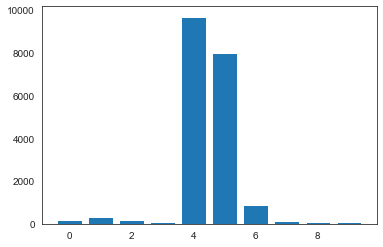

In [40]:
from sklearn.datasets import make_regression
from sklearn.inspection import permutation_importance
from matplotlib import pyplot
# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# define the model
model = KNeighborsRegressor()
# fit the model
model.fit(X, y)
# perform permutation importance
results = permutation_importance(model, X, y, scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

### 1. Linear Regression, Lasso, Ridge

In [ ]:
lr_reg = LinearRegression()
df_lr = train_val_predict(lr_reg, X_train_fe, y_train_fe, X_test_fe, y_test_fe, '5-Fold LinearRegression', model = 'LR')

In [ ]:
%%time
print('Using the 5-Fold Lasso Regression to train, validate and predict'); print('--'*57)
lasso_reg = Lasso(alpha = 0.01)
df_lasso = train_val_predict(lasso_reg, X_train_fe, y_train_fe, X_test_fe, y_test_fe, '5-Fold LassoRegression', model = 'Lasso')
df = df_lr.append(df_lasso)

In [ ]:

%%time
print('Using the 5-Fold Ridge Regression to train, validate and predict'); print('--'*57)
ridge_reg = Ridge(alpha = 0.01)
df_ridge = train_val_predict(ridge_reg, X_train_fe, y_train_fe, X_test_fe, y_test_fe, '5-Fold RidgeRegression', model = 'Ridge')
df = df.append(df_ridge)
display(df)

### 2. Decision Tree and Random Forest

In [ ]:
%%time
print('Finding out the hyperparameters for Decision Tree and Random Forest with GridSearchCV'); print('--'*57)
best_params_grid = {}

# Decision Tree and Random Forest Regressor Hyperparameters Grid
param_grid = {'DecisionTree': {'criterion': ['mse', 'mae'], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, None]},
              'RandomForest': {'bootstrap': [True, False], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, None],
                                'max_features': ['auto', 'sqrt'], 'n_estimators': [200, 400, 600, 800]}}

# Decision Tree Regressor
dt_reg = DecisionTreeRegressor(random_state = random_state)
dt_reg_grid = GridSearchCV(dt_reg, param_grid['DecisionTree'], cv = 5, n_jobs = -1, verbose = False, scoring = 'r2')
dt_reg_grid.fit(X_train_fe, y_train_fe)
best_params_grid['DecisionTree'] = dt_reg_grid.best_params_

# Random Forest Regressor
rf_reg = RandomForestRegressor(random_state = random_state)
rf_reg_grid = GridSearchCV(rf_reg, param_grid['RandomForest'], cv = 5, n_jobs = -1, verbose = False, scoring = 'r2')
rf_reg_grid.fit(X_train_fe, y_train_fe)
best_params_grid['RandomForest'] = rf_reg_grid.best_params_

print(f'Best parameters for Decision Tree and Random Forest using GridSearchCV: {best_params_grid}')

In [ ]:
%%time
print('Finding out the hyperparameters for Decision Tree and Random Forest with RandomizedSearchCV'); print('--'*57)
best_params_random = {}

# Decision Tree and Random Forest Regressor Hyperparameters Grid
param_grid = {'DecisionTree': {'criterion': ['mse', 'mae'], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, None]},
              'RandomForest': {'bootstrap': [True, False], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, None],
                                'max_features': ['auto', 'sqrt'], 'n_estimators': [200, 400, 600, 800]}}

# Decision Tree Regressor
dt_reg = DecisionTreeRegressor(random_state = random_state)
dt_reg_grid = RandomizedSearchCV(dt_reg, param_grid['DecisionTree'], cv = 5, n_jobs = -1, verbose = False, scoring = 'r2')
dt_reg_grid.fit(X_train_fe, y_train_fe)
best_params_random['DecisionTree'] = dt_reg_grid.best_params_

# Random Forest Regressor
rf_reg = RandomForestRegressor(random_state = random_state)
rf_reg_grid = RandomizedSearchCV(rf_reg, param_grid['RandomForest'], cv = 5, n_jobs = -1, verbose = False, scoring = 'r2')
rf_reg_grid.fit(X_train_fe, y_train_fe)
best_params_random['RandomForest'] = rf_reg_grid.best_params_

print(f'Best parameters for Decision Tree and Random Forest using RandomizedSearchCV: {best_params_random}')

In [ ]:

%%time
print('Using the 5-Fold Decision Tree Regressor to train, validate and predict'); print('--'*57)
dt_reg = DecisionTreeRegressor(random_state = random_state)
df_reg = train_val_predict(dt_reg, X_train_fe, y_train_fe, X_test_fe, y_test_fe, '5-Fold DecisionTree', model = 'DT')
df = df.append(df_reg)

In [ ]:
%%time
print('Using the 5-Fold Decision Tree Regressor to train, validate and predict using GridSearchCV'); print('--'*57)
dt_reg_grid = DecisionTreeRegressor(random_state = random_state, **best_params_grid['DecisionTree'])
df_reg_grid = train_val_predict(dt_reg_grid, X_train_fe, y_train_fe, X_test_fe, y_test_fe, '5-Fold DecisionTree GridSearchCV', model = 'DT')
df = df.append(df_reg_grid)

In [ ]:
%%time
print('Using the 5-Fold Decision Tree Regressor to train, validate and predict using RandomizedSearchCV'); print('--'*57)
dt_reg_rand = DecisionTreeRegressor(random_state = random_state, **best_params_random['DecisionTree'])
df_reg_rand = train_val_predict(dt_reg_rand, X_train_fe, y_train_fe, X_test_fe, y_test_fe, '5-Fold DecisionTree RandomizedSearchCV', model = 'DT')
df = df.append(df_reg_rand)
display(df)

In [ ]:

%%time
print('Using the 5-Fold Random Forest Regressor to train, validate and predict'); print('--'*57)
rf_reg = RandomForestRegressor(random_state = random_state)
df_reg = train_val_predict(rf_reg, X_train_fe, y_train_fe, X_test_fe, y_test_fe, '5-Fold RandomForest', model = 'RF')
df = df.append(df_reg)

In [ ]:
%%time
print('Using the 5-Fold Random Forest Regressor to train, validate and predict using GridSearchCV'); print('--'*57)
rf_reg_grid = RandomForestRegressor(random_state = random_state, **best_params_grid['RandomForest'])
df_reg_grid = train_val_predict(rf_reg_grid, X_train_fe, y_train_fe, X_test_fe, y_test_fe, '5-Fold RandomForest GridSearchCV', model = 'RF')
df = df.append(df_reg_grid)

In [ ]:
%%time
print('Using the 5-Fold Random Forest Regressor to train, validate and predict using RandomizedSearchCV'); print('--'*57)
rf_reg_rand = RandomForestRegressor(random_state = random_state, **best_params_random['RandomForest'])
df_reg_rand = train_val_predict(rf_reg_rand, X_train_fe, y_train_fe, X_test_fe, y_test_fe, '5-Fold RandomForest RandomizedSearchCV', model = 'RF')
df = df.append(df_reg_rand)
display(df)

### AdaBoost, GradientBoost and ExtraTrees

In [ ]:
%%time
print('Using the 5-Fold Ada Boost Regressor to train, validate and predict'); print('--'*57)
ada_reg = AdaBoostRegressor(random_state = random_state)
df_reg = train_val_predict(ada_reg, X_train_fe, y_train_fe, X_test_fe, y_test_fe, '5-Fold AdaBoost', model = 'Ada')
df = df.append(df_reg)

In [ ]:
%%time
# AdaBoost Regressor Hyperparameters Grid
print('Finding out the hyperparameters for AdaBoostRegressor with GridSearchCV'); print('--'*57)

param_grid = {'AdaBoost': {'base_estimator': [DecisionTreeRegressor(random_state = random_state, **best_params_grid['DecisionTree']), None],
                           'n_estimators': [100, 150, 200], 'learning_rate': [0.01, 0.1, 1.0]}}

# AdaBoost Regressor
ada_reg = AdaBoostRegressor(random_state = random_state)
ada_reg_grid = GridSearchCV(ada_reg, param_grid['AdaBoost'], cv = 5, n_jobs = -1, verbose = False, scoring = 'r2')
ada_reg_grid.fit(X_train_fe, y_train_fe)
best_params_grid['AdaBoost'] = ada_reg_grid.best_params_

print('Best parameters for AdaBoost Regressor using GridSearchCV: {}'.format(best_params_grid['AdaBoost']))

In [ ]:
%%time
# AdaBoost Regressor Hyperparameters Grid
print('Finding out the hyperparameters for AdaBoostRegressor with RandomizedSearchCV'); print('--'*57)

param_grid = {'AdaBoost': {'base_estimator': [DecisionTreeRegressor(random_state = random_state, **best_params_grid['DecisionTree']), None],
                           'n_estimators': [100, 150, 200], 'learning_rate': [0.01, 0.1, 1.0]}}

# AdaBoost Regressor
ada_reg = AdaBoostRegressor(random_state = random_state)
ada_reg_grid = RandomizedSearchCV(ada_reg, param_grid['AdaBoost'], cv = 5, n_jobs = -1, verbose = False, scoring = 'r2')
ada_reg_grid.fit(X_train_fe, y_train_fe)
best_params_random['AdaBoost'] = ada_reg_grid.best_params_

print('Best parameters for AdaBoost Regressor using RandomizedSearchCV: {}'.format(best_params_random['AdaBoost']))

In [ ]:

%%time
print('Using the 5-Fold Ada Boost Regressor to train, validate and predict using GridSearchCV'); print('--'*57)
ada_reg_grid = AdaBoostRegressor(random_state = random_state, **best_params_grid['AdaBoost'])
df_reg_grid = train_val_predict(ada_reg_grid, X_train_fe, y_train_fe, X_test_fe, y_test_fe, '5-Fold AdaBoost using GridSearchCV', model = 'Ada')
df = df.append(df_reg_grid)

In [ ]:
%%time
print('Using the 5-Fold Ada Boost Regressor to train, validate and predict using RandomizedSearchCV'); print('--'*57)
ada_reg_rand = AdaBoostRegressor(random_state = random_state, **best_params_random['AdaBoost'])
df_reg_rand = train_val_predict(ada_reg_rand, X_train_fe, y_train_fe, X_test_fe, y_test_fe, '5-Fold AdaBoost using RandomizedSearchCV', model = 'Ada')
df = df.append(df_reg_rand)
display(df)

In [ ]:
%%time
# GradientBoostRegressor Hyperparameters Grid
print('Finding out the hyperparameters for GradientBoostRegressor with GridSearchCV'); print('--'*57)

param_grid = {'GradientBoost': {'max_depth': [5, 6, 7, 8, 9, 10, None], 'max_features': ['auto', 'sqrt'], 
                                'n_estimators': [600, 800, 1000]}}

# GradientBoostRegressor
gb_reg = GradientBoostingRegressor(random_state = random_state)
gb_reg_grid = GridSearchCV(gb_reg, param_grid['GradientBoost'], cv = 5, n_jobs = -1, verbose = False, scoring = 'r2')
gb_reg_grid.fit(X_train_fe, y_train_fe)
best_params_grid['GradientBoost'] = gb_reg_grid.best_params_

print('Best parameters for Gradient Boost Regressor using GridSearchCV: {}'.format(best_params_grid['GradientBoost']))

In [ ]:
%%time
# GradientBoostRegressor Hyperparameters Grid
print('Finding out the hyperparameters for GradientBoostRegressor with RandomizedSearchCV'); print('--'*57)

param_grid = {'GradientBoost': {'max_depth': [5, 6, 7, 8, 9, 10, None], 'max_features': ['auto', 'sqrt'], 
                                'n_estimators': [600, 800, 1000]}}

# GradientBoostRegressor
gb_reg = GradientBoostingRegressor(random_state = random_state)
gb_reg_rand = RandomizedSearchCV(gb_reg, param_grid['GradientBoost'], cv = 5, n_jobs = -1, verbose = False, scoring = 'r2')
gb_reg_rand.fit(X_train_fe, y_train_fe)
best_params_random['GradientBoost'] = gb_reg_rand.best_params_

print('Best parameters for Gradient Boost Regressor using RandomizedSearchCV: {}'.format(best_params_random['GradientBoost']))

In [ ]:
%%time
print('Using the 5-Fold Gradient Boost Regressor to train, validate and predict'); print('--'*57)
gb_reg = GradientBoostingRegressor(random_state = random_state)
df_reg = train_val_predict(gb_reg, X_train_fe, y_train_fe, X_test_fe, y_test_fe, '5-Fold GradientBoost', model = 'GB')
df = df.append(df_reg)

In [ ]:
%%time
print('Using the 5-Fold Gradient Boost Regressor to train, validate and predict using GridSearchCV'); print('--'*57)
gb_reg_grid = GradientBoostingRegressor(random_state = random_state, **best_params_grid['GradientBoost'])
df_reg_grid = train_val_predict(gb_reg_grid, X_train_fe, y_train_fe, X_test_fe, y_test_fe, '5-Fold GradientBoost using GridSearchCV', model = 'GB')
df = df.append(df_reg_grid)

In [ ]:

%%time
print('Using the 5-Fold Gradient Boost Regressor to train, validate and predict using RandomizedSearchCV'); print('--'*57)
gb_reg_rand = GradientBoostingRegressor(random_state = random_state, **best_params_random['GradientBoost'])
df_reg_rand = train_val_predict(gb_reg_rand, X_train_fe, y_train_fe, X_test_fe, y_test_fe, '5-Fold GradientBoost using RandomizedSearchCV', model = 'GB')
df = df.append(df_reg_rand)
display(df)

### ExtraTreesRegressor

In [ ]:
%%time
# ExtraTreesRegressor Hyperparameters Grid
print('Finding out the hyperparameters for ExtraTreesRegressor with GridSearchCV'); print('--'*57)

param_grid = {'ExtraTrees': {'max_depth': [5, 6, 7, 8, 9, 10, None], 'max_features': ['auto', 'sqrt'], 
                                'n_estimators': [100, 600, 800, 1000]}}

# ExtraTreesRegressor
et_reg = ExtraTreesRegressor(random_state = random_state)
et_reg_grid = GridSearchCV(et_reg, param_grid['ExtraTrees'], cv = 5, n_jobs = -1, verbose = False, scoring = 'r2')
et_reg_grid.fit(X_train_fe, y_train_fe)
best_params_grid['ExtraTrees'] = et_reg_grid.best_params_

print('Best parameters for Extra Trees Regressor using GridSearchCV: {}'.format(best_params_grid['ExtraTrees']))

In [ ]:

%%time
# ExtraTreesRegressor Hyperparameters Grid
print('Finding out the hyperparameters for ExtraTreesRegressor with RandomizedSearchCV'); print('--'*57)

param_grid = {'ExtraTrees': {'max_depth': [5, 6, 7, 8, 9, 10, None], 'max_features': ['auto', 'sqrt'], 
                                'n_estimators': [100, 600, 800, 1000]}}

# ExtraTreesRegressor
et_reg = ExtraTreesRegressor(random_state = random_state)
et_reg_rand = RandomizedSearchCV(et_reg, param_grid['ExtraTrees'], cv = 5, n_jobs = -1, verbose = False, scoring = 'r2')
et_reg_rand.fit(X_train_fe, y_train_fe)
best_params_random['ExtraTrees'] = et_reg_rand.best_params_

print('Best parameters for Extra Trees Regressor using RandomizedSearchCV: {}'.format(best_params_random['ExtraTrees']))

In [ ]:
%%time
print('Using the 5-Fold Extra Trees Regressor to train, validate and predict'); print('--'*57)
et_reg = ExtraTreesRegressor(random_state = random_state)
df_reg = train_val_predict(et_reg, X_train_fe, y_train_fe, X_test_fe, y_test_fe, '5-Fold ExtraTrees', model = 'ET')
df = df.append(df_reg)

In [ ]:

%%time
print('Using the 5-Fold Extra Trees Regressor to train, validate and predict using GridSearchCV'); print('--'*57)
et_reg_grid = ExtraTreesRegressor(random_state = random_state, **best_params_grid['ExtraTrees'])
df_reg_grid = train_val_predict(et_reg_grid, X_train_fe, y_train_fe, X_test_fe, y_test_fe, '5-Fold ExtraTrees using GridSearchCV', model = 'ET')
df = df.append(df_reg_grid)

In [ ]:
%%time
print('Using the 5-Fold Extra Trees Regressor to train, validate and predict using RandomizedSearchCV'); print('--'*57)
et_reg_rand = ExtraTreesRegressor(random_state = random_state, **best_params_random['ExtraTrees'])
df_reg_rand = train_val_predict(et_reg_rand, X_train_fe, y_train_fe, X_test_fe, y_test_fe, '5-Fold ExtraTrees using RandomizedSearchCV', model = 'ET')
df = df.append(df_reg_rand)
display(df)

### Bootstrapping Confidence Level

In [ ]:
%%time
values = concrete_im.values
n_iterations = 500 # Number of bootstrap samples to create
n_size = int(len(concrete_im) * 1) # size of a bootstrap sample

# run bootstrap
stats = list() # empty list that will hold the scores for each bootstrap iteration
for i in range(n_iterations):
  # prepare train and test sets
  train = resample(values, n_samples = n_size) # Sampling with replacement 
  test = np.array([x for x in values if x.tolist() not in train.tolist()]) # picking rest of the data not considered in sample
  
  # fit model
  gb_reg_grid = GradientBoostingRegressor(random_state = random_state, **best_params_grid['GradientBoost'])
  gb_reg_grid.fit(train[:, :-1], train[:, -1]) # fit against independent variables and corresponding target values

  # evaluate model
  predictions = gb_reg_grid.predict(test[:, :-1]) # predict based on independent variables in the test data
  score = r2_score(test[:, -1], predictions)
  stats.append(score)

In [ ]:
# plot scores
plt.figure(figsize = (15, 7.2))
plt.hist(stats); plt.show()

# confidence intervals
alpha = 0.95 # for 95% confidence 
p = ((1.0 - alpha) / 2.0) * 100 # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  

p = (alpha + ((1.0 - alpha) / 2.0)) * 100
upper = min(1.0, np.percentile(stats, p))

print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

In [ ]:
display(df)